# Working with DataFrame Part2

## Outliers Exercises

In this lecture we wiil see how we would find outliers in a dataset.

Basic imports

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#### We create a data frame
Every column represent a normal distribution of random data points.

In [23]:
# First we'll seed the numpy generator
np.random.seed(12)

#Next we'll create the dataframe
df = DataFrame(np.random.randn(1000,4))

In [24]:
#Show the df
df.head()

,0,1,2,3
0,0.472986,-0.681426,0.242439,-1.700736
1,0.753143,-1.534721,0.005127,-0.120228
2,-0.806982,2.871819,-0.597823,0.472457
3,1.095956,-1.215169,1.342356,-0.122150
4,1.012515,-0.913869,-1.029530,1.209796


In [27]:
# Lets describe the data
df.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.019826,-0.020608,-0.036681,-0.032079
std,0.994230,0.998738,0.984190,0.994405
min,-3.147417,-4.011049,-3.015915,-3.710679
25%,-0.664809,-0.719489,-0.684463,-0.710911
50%,0.003597,-0.028044,-0.044665,-0.035832
75%,0.736373,0.682833,0.620109,0.612202
max,3.166557,2.978985,3.529275,3.344649


### Plot a boxplot of the column 0

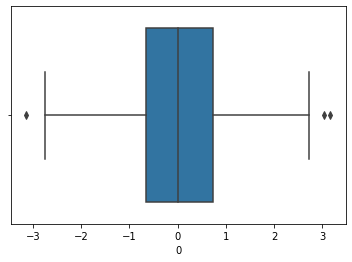

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.boxplot(x=df[0])
plt.show()

**Note:** From the boxplot we can see that in column 0 there are a few outliers, we considere those values outlires because... 

### Plot the Kernel Density Estimate

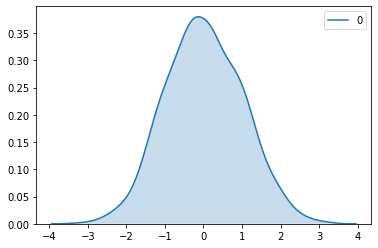

In [34]:
sns.kdeplot(df[0], shade=True)
plt.show()

In [35]:
# Lets select the first column (it will be a series)
col = df[0]

We can check which values in the column are greater than 3, for instance.

In [36]:
# check the values
col[np.abs(col)>3]

12    -3.147417
27     3.041686
124    3.166557
Name: 0, dtype: float64

So we now know that in column[0], rows 235 and 910 have values with abs > 3

### How about all the columns?

We can use the **any** method. It returns whether any element is True, potentially over an axis. Axis 0 by default.

In [37]:
# We can use the "any" method
filtered_df = df[(np.abs(df)>3).any(1)]
filtered_df

,0,1,2,3
12,-3.147417,0.535136,0.232490,0.867612
27,3.041686,-0.626081,1.505901,-0.587336
60,0.224547,-1.163467,-3.015915,0.593969
124,3.166557,1.383956,-0.077316,-0.911826
137,-1.812846,0.916503,-0.888640,-3.710679
149,1.214205,-0.862325,-0.553625,-3.155014
213,-0.347810,1.281499,-0.217167,3.041318
263,-1.524350,-0.539390,3.087539,-0.370562
445,-0.284077,0.282750,0.096077,3.344649
591,1.303257,-1.362288,-3.015906,-0.747110


### Remove outliers

First we isolate the index of rows where we found the outlires 

In [38]:
# grab the index
rows = filtered_df.index
len(rows)

12

Second we drop the drows

In [39]:
# drop the rows
df.drop(rows, inplace=True)

In [40]:
# check on the df
df.shape

(988, 4)

# Nice job!